In [1]:
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')

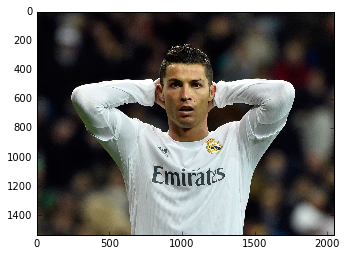

In [5]:
img1 = cv2.imread('/home/manik/images/ronaldo2.jpg')
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

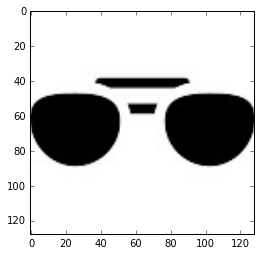

In [6]:
img2 = cv2.imread('/home/manik/images/glasses2.jpg')
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

In [7]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [8]:
ret,mask = cv2.threshold(img2_gray,127,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

836 362 378 378
(378, 378, 3)


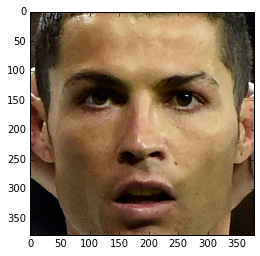

In [9]:
#finding out the face here. I only need x,y for future
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(img1_gray,1.3,5)
x,y,w,h = face[0,:]
roi = img1[y:y+h,x:x+w]
roi_rgb = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
plt.imshow(roi_rgb)
print x,y,w,h
print roi.shape

In [10]:
print img2.shape
print face.shape

(128, 128, 3)
(1, 4)


In [11]:
eyes = eye_cascade.detectMultiScale(roi_gray)
print eyes.shape

(3, 4)


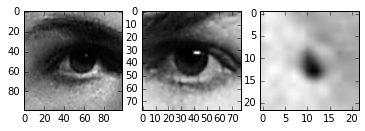

In [12]:
#found 1 false positive when detecting eyes. Ignoring it. Also by default the first eye is the left one
i = 1
for (ex,ey,ew,eh) in eyes:
    plt.subplot(1,3,i),plt.imshow(roi_gray[ey:ey+eh,ex:ex+ew],'gray')
    i = i+1

In [13]:
#height of just sunglasses is about 50 pixels and width is about 120. Scaling should work
lex,ley,lew,leh = eyes[0,:]
rex,rey,rew,reh = eyes[1,:]
req_width = rex + rew - lex
req_height = req_width*img2.shape[0]/img2.shape[1]
print req_width,req_height

239 239


In [14]:
#resizing everything
glasses = cv2.resize(img2,(req_width,req_height),interpolation= cv2.INTER_AREA)
mask = cv2.resize(mask,(req_width,req_height),interpolation= cv2.INTER_AREA)
mask_inv = cv2.resize(mask_inv,(req_width,req_height),interpolation= cv2.INTER_AREA)

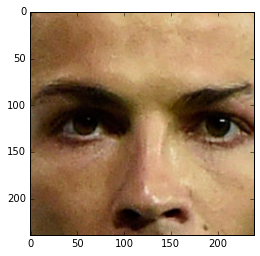

In [15]:
#now placement
top_left = ley - req_width/img2.shape[1]*70 
#70 is arbitrary. 
#It is the useless black part above the sunglasses in img2. seems to be around 40 pixels but 70 seems to give better
#results. 
roi = img1[top_left + y:y + top_left + req_height,lex + x:x + lex + req_width]
roi_rgb = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
plt.imshow(roi_rgb)

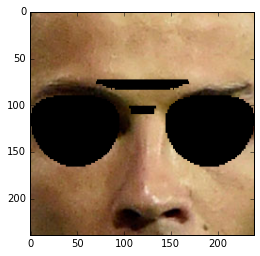

In [16]:
#now is the easy part
roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
roi_bg_rgb = cv2.cvtColor(roi_bg,cv2.COLOR_BGR2RGB)
plt.imshow(roi_bg_rgb)

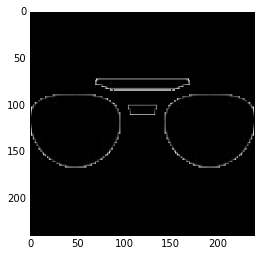

In [17]:
roi_fg = cv2.bitwise_and(glasses,glasses,mask = mask_inv)
plt.imshow(roi_fg,'gray')

In [18]:
dst = cv2.add(roi_bg,roi_fg)

In [19]:
img1[top_left + y:y + top_left + req_height,lex + x:x + lex + req_width] = dst

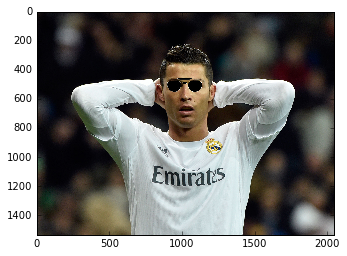

In [20]:
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)